In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('../datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Perguntas

1. Quantos homens e quantas mulheres morreram?
2. Quantos homens e mulheres que embarcaram em cada cidade?
3. Quantos homens e mulheres embarcaram em cada classe?
4. Qual percentual de morte por classe?
5. Para faixas de idade (5 em 5 anos) percentual de quantas pessoas morreram e sobreviveram por sexo
6. Quais variáveis explicam a maior mortalidade de mulheres?
7. A sobrevivencia das pessoas está ligada ao Titulo dela?
8. % de pessoas que morreram que tinham parentes?
9. Quantas pessoas morreram que eram da mesma cabine?
10. Para cada classe, quais cabines tem maior probabilidade de morte?
11. O preço do ticket tem relação com sobrevivencia?


In [22]:
# pergunta 1

df.groupby(['Survived', 'Sex'])['PassengerId'].count().unstack()

Sex,female,male
Survived,,
0,81,468
1,233,109


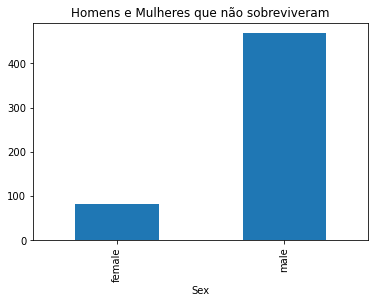

In [27]:
df.groupby(['Survived', 'Sex'])['PassengerId'].count().unstack().loc[0].plot.bar(title='Homens e Mulheres que não sobreviveram')


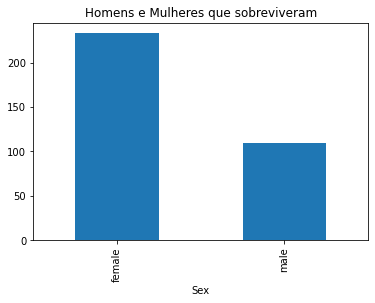

In [26]:
df.groupby(['Survived', 'Sex'])['PassengerId'].count().unstack().loc[1].plot.bar(title='Homens e Mulheres que sobreviveram')b

In [112]:

df_grouped = df.groupby(['Survived', 'Sex'])['PassengerId'].count()
df_grouped = df_grouped.reset_index()
df_grouped

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


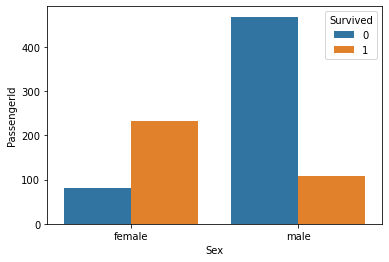

In [79]:
sns.barplot(x="Sex", y="PassengerId", hue="Survived", data=df_grouped)

In [85]:
df.groupby(['Sex']).count()['PassengerId']

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [116]:
df_grouped = df.groupby(['Sex', 'Survived'])['PassengerId'].count()
df_grouped = df_grouped.unstack()

df_grouped.loc['female'] = df_grouped.loc['female']/df_grouped.loc['female'].sum()
df_grouped.loc['male'] = df_grouped.loc['male']/df_grouped.loc['male'].sum()

df_grouped

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [118]:
df_grouped.reset_index()

Survived,Sex,0,1
0,female,0.257962,0.742038
1,male,0.811092,0.188908


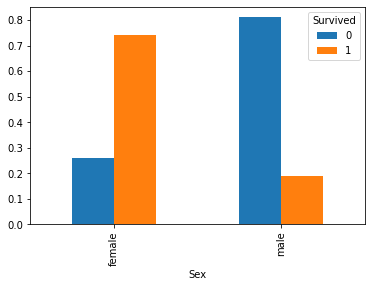

In [126]:
df_grouped.plot.bar()

In [130]:
# 2. Quantos homens e mulheres que embarcaram em cada cidade?

df.groupby(['Embarked', 'Sex'])['PassengerId'].count().unstack()

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


In [150]:
df_grouped=df.groupby(['Embarked', 'Sex'])['PassengerId'].count()

In [151]:
df_grouped

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

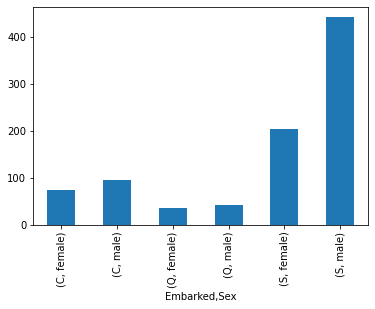

In [136]:
df_grouped.plot.bar()

In [152]:
df_grouped = df_grouped.reset_index()

In [153]:
df_grouped

,Embarked,Sex,PassengerId
0,C,female,73
1,C,male,95
2,Q,female,36
3,Q,male,41
4,S,female,203
5,S,male,441


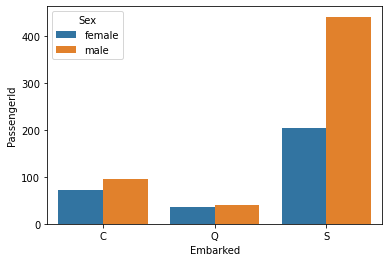

In [155]:
sns.barplot(x="Embarked", y="PassengerId", hue="Sex", data=df_grouped)

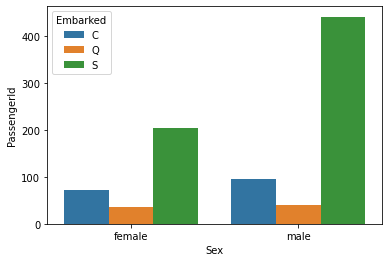

In [156]:
sns.barplot(x="Sex", y="PassengerId", hue="Embarked", data=df_grouped)

In [159]:
# 3. Quantos homens e mulheres embarcaram em cada classe?

df_grouped=df.groupby(['Pclass', 'Sex'])['PassengerId'].count().reset_index()
df_grouped

,Pclass,Sex,PassengerId
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


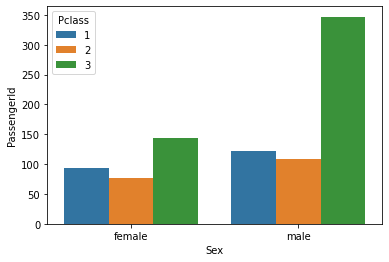

In [160]:
sns.barplot(x="Sex", y="PassengerId", hue="Pclass", data=df_grouped)

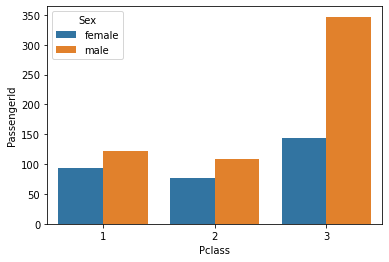

In [161]:
sns.barplot(x="Pclass", y="PassengerId", hue="Sex", data=df_grouped)

In [163]:
# 4. Qual percentual de morte por classe?

df_grouped= df.groupby(['Survived', 'Pclass'])['PassengerId'].count()
df_grouped

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

In [186]:
df_grouped = df_grouped.unstack().apply(lambda x: x/sum(x))

In [192]:
df_grouped

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


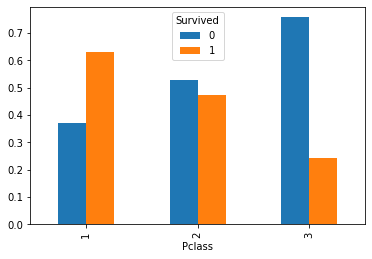

In [195]:
df_grouped.T.plot.bar()

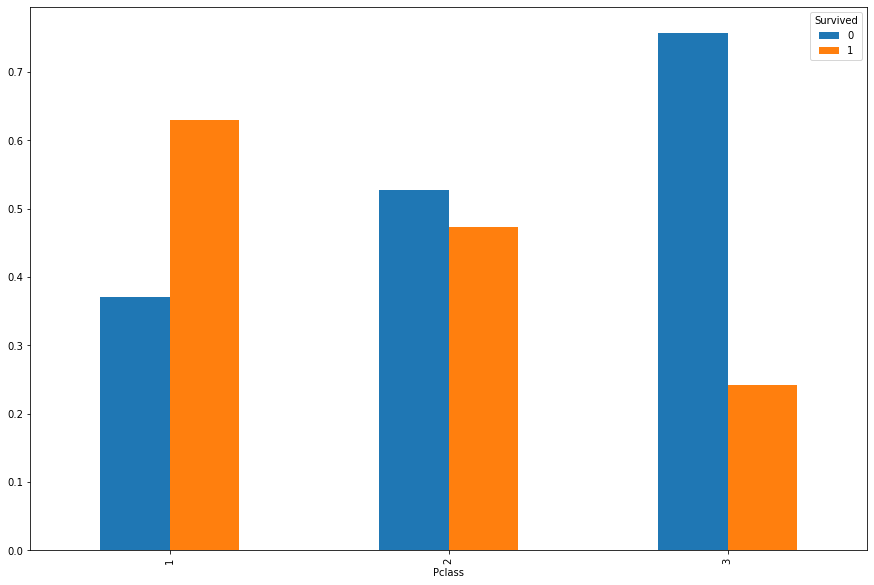

In [201]:
fig = df.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack().apply(lambda x: x/sum(x), axis=1).plot.bar(figsize=(15, 10))
fig

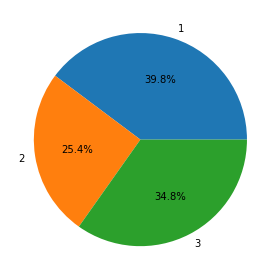

In [184]:
pie_df = df.groupby('Pclass').sum()
plt.pie(x = pie_df['Survived'], labels = pie_df.index, autopct='%1.1f%%')
plt.tight_layout()


In [185]:
pie_df

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [204]:


# 1/2 + 3/4 + 5/6  =  (6 + 9 + 10)/12

342

In [212]:
# 5. Para faixas de idade (5 em 5 anos) percentual de quantas pessoas morreram e sobreviveram por sexo

print(df['Age'].min())
print(df['Age'].max())

0.42
80.0


In [251]:
count = int(input('Digite quantos grupos: '))

Digite quantos grupos: 5


In [252]:
df['Age_group'] = df['Age'].apply(lambda x: x//count)



In [253]:
df['Age_group'].value_counts()

4.0     114
5.0     106
6.0      95
3.0      86
7.0      72
8.0      48
9.0      41
0.0      40
10.0     32
1.0      22
11.0     16
2.0      16
12.0     15
14.0      6
13.0      4
16.0      1
Name: Age_group, dtype: int64

In [286]:
df_grouped = df.groupby(['Age_group', 'Sex', 'Survived'])['PassengerId'].count().unstack().apply(lambda x: x/sum(x), axis=1)
df_grouped = df_grouped.reset_index()
df_grouped

Survived,Age_group,Sex,0,1
0,0.0,female,0.294118,0.705882
1,0.0,male,0.347826,0.652174
2,1.0,female,0.461538,0.538462
3,1.0,male,0.555556,0.444444
4,2.0,female,0.444444,0.555556
5,2.0,male,0.714286,0.285714
6,3.0,female,0.194444,0.805556
7,3.0,male,0.900000,0.100000
8,4.0,female,0.238095,0.761905
9,4.0,male,0.902778,0.097222


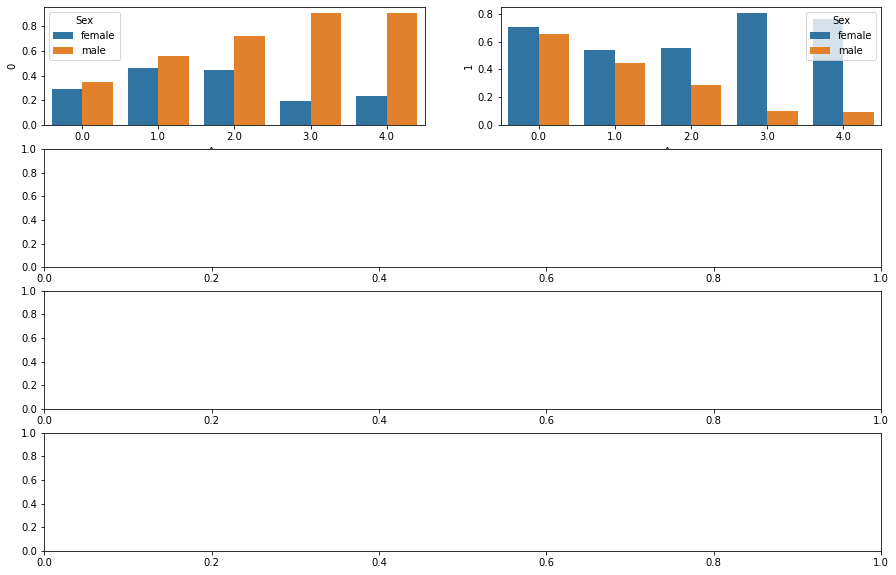

In [310]:
gridsize = (4,2)

plt.subplots(figsize=(15, 10))
ax1_0 = plt.subplot2grid(gridsize,(0, 0),colspan = 1,rowspan = 1)
ax1_1 = plt.subplot2grid(gridsize,(0, 1),colspan = 1,rowspan = 1)

ax2_0 = plt.subplot2grid(gridsize,(1, 0),colspan = 1,rowspan = 1)
ax2_1 = plt.subplot2grid(gridsize,(1, 1),colspan = 1,rowspan = 1)

ax3_0 = plt.subplot2grid(gridsize,(2, 0),colspan = 1,rowspan = 1)
ax3_1 = plt.subplot2grid(gridsize,(2, 1),colspan = 1,rowspan = 1)

ax4_0 = plt.subplot2grid(gridsize,(3, 0),colspan = 1,rowspan = 1)
ax4_1 = plt.subplot2grid(gridsize,(3, 1),colspan = 1,rowspan = 1)

# ax1, ax2, ax3, ax4 = plt.subplots(ncols=2, nrows=2, figsize=(15, 20))
df.dropna()


sns.barplot(data=df_grouped[df_grouped['Age_group'] < 5], x='Age_group', y=0, hue='Sex', ax=ax1_0)
sns.barplot(data=df_grouped[df_grouped['Age_group'] < 5], x='Age_group', y=1, hue='Sex', ax=ax1_1)

sns.barplot(data=df_grouped[(df_grouped['Age_group'] >=5) &(df_grouped['Age_group'] < 10)], x='Age_group', y=0, hue='Sex', ax=ax2_0)
sns.barplot(data=df_grouped[(df_grouped['Age_group'] >=5) &(df_grouped['Age_group'] < 10)], x='Age_group', y=0, hue='Sex', ax=ax2)

sns.barplot(data=df_grouped[(df_grouped['Age_group'] >=10) &(df_grouped['Age_group'] < 15)], x='Age_group', y=0, hue='Sex', ax=ax3)
sns.barplot(data=df_grouped[(df_grouped['Age_group'] >=15)], x='Age_group', y=0, hue='Sex', ax=ax4)

sns.barplot(data=df_grouped[df_grouped['Age_group'] < 5], x='Age_group', y=0, hue='Sex', ax=ax1)
sns.barplot(data=df_grouped[df_grouped['Age_group'] < 5], x='Age_group', y=0, hue='Sex', ax=ax1)
